In [1]:
import h5py
import numpy as np
import pickle as pk
import os
import matplotlib.pyplot as plt
from scipy.stats import gmean

In [2]:
#hdf5=h5py.File('/project/projectdirs/polar/data/largepatch_reanalysis/largepatch_planck_sim_set/lowell_2_20210220/final_spectra_pack.hdf5','r')
hdf5=h5py.File('/project/projectdirs/polar/data/largepatch_reanalysis/largepatch_planck_sim_set/lowell_4_20210328/final_spectra_pack_unblind.hdf5','r' )

In [3]:
bins = hdf5['noise_fullcross/polarbearxpolarbear/bins'][:]
binsbmid = np.mean(bins, axis=1)
dofbin=binsbmid*50*2
binsl = hdf5['signal_fullcross/tt/binsl'][:]
binslmid = hdf5['signal_fullcross/tt/binslmid'][:]
C2Db = binsbmid * (binsbmid + 1) / (2 * np.pi)
D2Cb = 1. / C2Db
C2Dl = binslmid * (binslmid + 1) / (2 * np.pi)
D2Cl = 1. / C2Dl

In [4]:
spectra_keys = ['tt', 'ee', 'bb', 'te', 'tb', 'eb']
freq_name = ['planck_143','pb', 'planck_217','planck_353']

Text(0.5, 1.0, 'noise_fullcross/exp1xexp2/bb/Cb')

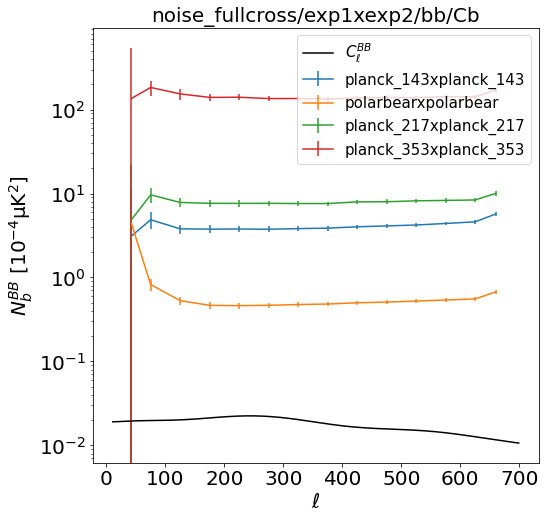

In [5]:
theory = hdf5['signal_fullcross/bb']['theorycl'][:] * 1e-12

plt.figure(figsize=(8,8))
plt.plot(binslmid, theory*D2Cl*1e16, label='$C_\ell^{BB}$',c='k')
for name in freq_name:
    name_ = 'polarbear' if name=='pb' else name

    foldername = os.path.join('workspace/noise_bias_fid_pb_fakeauto',name)
    os.makedirs(foldername,exist_ok=True)
    keys = 'bb'
    noise = hdf5[f"noise_fullcross/{name_}x{name_}/{keys}"]['Cb'][:,:].mean(axis=0)
    err = hdf5[f"noise_fullcross/{name_}x{name_}/{keys}"]['Cb'][:,:].std(axis=0)
    #print(binsbmid,noise,err)
    plt.errorbar(binsbmid,noise*D2Cb*1e16,yerr=err*D2Cb*1e16,label=f"{name_}x{name_}")
    #plt.plot(binslmid, noise,label=f"{name_}x{name_}")
plt.legend(fontsize='15')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.semilogy()
plt.xlabel('$\ell$',fontsize='20')
plt.ylabel('$N_b^{BB}\ [10^{-4}\mathdefault{μK}^2]$',fontsize='20')
plt.title('noise_fullcross/exp1xexp2/bb/Cb', fontsize='20')
#plt.savefig('plots/noise_fullcross_first_run.png',bbox_inches='tight')

In [6]:
def make_filename(exp1,exp2):
    if exp1 == exp2:
        return exp1
    else:
        if exp1 == "pb":
            return f"{exp2}_{exp1}"
        else:
            return f"{exp1}_{exp2}"

def make_keyname(exp1,exp2):
    exp1 = 'polarbear' if exp1 == 'pb' else exp1
    exp2 = 'polarbear' if exp2 == 'pb' else exp2
    
    if exp1 == 'polarbear':
        return f"{exp2}x{exp1}"
    else:
        return f"{exp1}x{exp2}"
      

In [7]:
DsBB_cmb = hdf5['signal_fullcross/bb']['theorycb'][:] * 1e-12
DlBB_cmb = hdf5['signal_fullcross/bb']['theorycl'][:] * 1e-12
DlBB_dust = 9.e-3*(binslmid/80)**(-0.6) * 1e-12
DsBB_dust = np.dot(hdf5['signal_fullcross/bb']['bpwf'][:],DlBB_dust)
DsBB = DsBB_cmb + DsBB_dust
DlBB = DlBB_cmb + DlBB_dust

Text(0.5, 1.0, 'real_fullcross/exp1xexp2/bb/Cb')

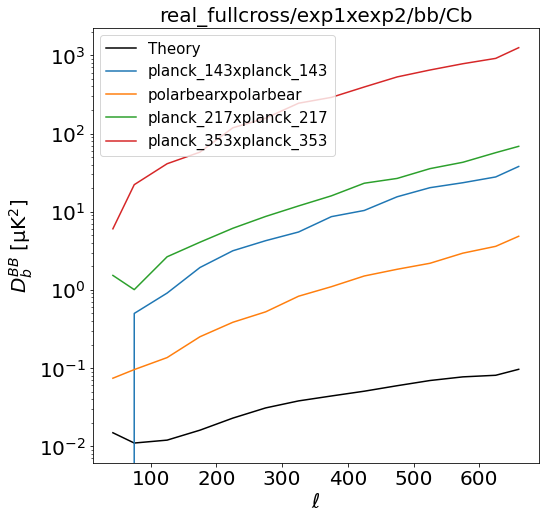

In [8]:
plt.figure(figsize=(8,8))
plt.plot(binsbmid,DsBB*1e12,label='Theory',c='k')
#plt.plot(binsbmid,hdf5['real_internalcross/polarbearxpolarbear/bb']['Cb'][:]*1e12,label="internal_cross")
for i, exp1 in enumerate(freq_name):
    for j, exp2 in enumerate(freq_name):
        if i == j:

            keys = 'bb'
            key = f"real_fullcross/{make_keyname(exp1,exp2)}/{keys}"
            plt.plot(binsbmid,hdf5[key]['Cb'][:]*1e12,label=f"{make_keyname(exp1,exp2)}")

plt.xlabel('$\ell$',fontsize='20')
plt.ylabel('$D_b^{BB}\ [\mathdefault{µK}^2]$',fontsize='20')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.legend(fontsize='15')
plt.semilogy()
plt.title('real_fullcross/exp1xexp2/bb/Cb',fontsize='20')
#plt.savefig('plots/real_fullcross_first_run_ic.png',bbox_inches='tight')

Text(0.5, 1.0, 'real_fullcross/exp1xexp2/bb/nub')

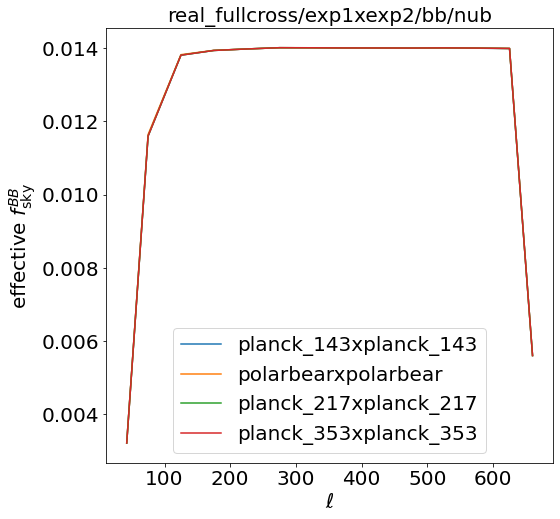

In [9]:
plt.figure(figsize=(8,8))
for i, exp1 in enumerate(freq_name):
    for j, exp2 in enumerate(freq_name):
        if i == j:
            keys = 'bb'
            key = f"real_fullcross/{make_keyname(exp1,exp2)}/{keys}"
            plt.plot(binsbmid,hdf5[key]['nub'][:]/dofbin,label=f"{make_keyname(exp1,exp2)}")
plt.legend(fontsize='20')
plt.xlabel('$\ell$',fontsize='20')
plt.ylabel('effective $f_\mathdefault{sky}^{BB}$',fontsize='20')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.title('real_fullcross/exp1xexp2/bb/nub',fontsize='20')
#plt.savefig('plots/dof_first_run.png', bbox_inches='tight')

In [10]:
DsBB_sim = hdf5['signal_fullcross/bb']['Cb'][:,:].mean(axis=0)
DsBB_cv = hdf5['signal_fullcross/bb']['Cb'][:,:].std(axis=0)
dofsBB=(DsBB_sim/DsBB_cv)**2*2

In [11]:
dof = {}
for i, exp1 in enumerate(freq_name):
    for j, exp2 in enumerate(freq_name):
        if i == j:
            keys = 'bb'
            bias = hdf5[f"noise_fullcross/{make_keyname(exp1,exp2)}/{keys}"]['Cb'][:,:].mean(axis=0)
            std = hdf5[f"noise_fullcross/{make_keyname(exp1,exp2)}/{keys}"]['Cb'][:,:].std(axis=0)
            dof[make_filename(exp1,exp2)] = (bias/std)**2*2
            

planck = []
for key in dof.keys():
    if 'planck' in key:
        planck.append(dof[key])
planck = gmean(np.array(planck))

planck_pb = []
for key in dof.keys():
    planck_pb.append(dof[key])
planck_pb = gmean(np.array(planck_pb))

Text(0.5, 1.0, 'Degree of Freedom')

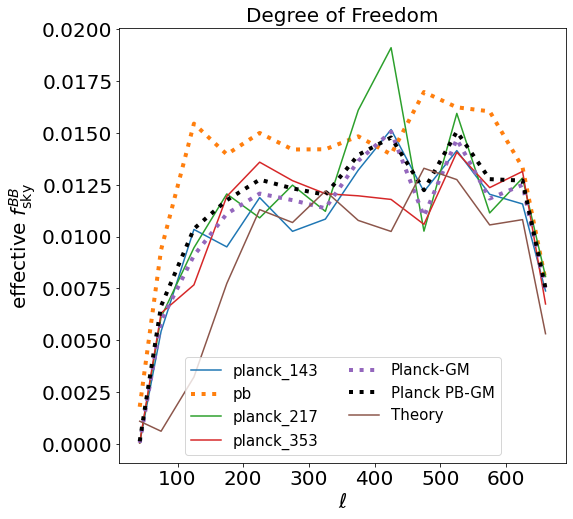

In [12]:
plt.figure(figsize=(8,8))
for key in dof.keys():
    if key == 'pb':
        plt.plot(binsbmid, dof[key]/dofbin,label=key,lw=4,ls=':')
    else:
        plt.plot(binsbmid, dof[key]/dofbin,label=key)
plt.plot(binsbmid,planck/dofbin,label="Planck-GM",lw=4,ls=':')
plt.plot(binsbmid,planck_pb/dofbin,label="Planck PB-GM",c='k',lw=4,ls=':') 
plt.plot(binsbmid, dofsBB/dofbin,label='Theory')
plt.legend(ncol=2,fontsize='15',loc='lower center')
plt.xlabel('$\ell$',fontsize='20')
plt.ylabel('effective $f_\mathdefault{sky}^{BB}$',fontsize='20')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.title('Degree of Freedom',fontsize='20')
#plt.savefig('plots/dof_proposal.png', bbox_inches='tight')

Text(0.5, 1.0, 'Degree of Freedom')

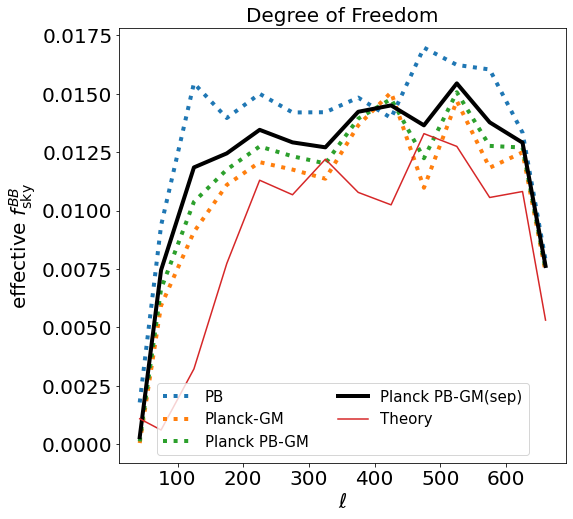

In [26]:
plt.figure(figsize=(8,8))
plt.plot(binsbmid, dof['pb']/dofbin,label="PB",lw=4,ls=':')
plt.plot(binsbmid,planck/dofbin,label="Planck-GM",lw=4,ls=':')
plt.plot(binsbmid,planck_pb/dofbin,label="Planck PB-GM",lw=4,ls=':')
plt.plot(binsbmid,np.sqrt(planck*dof['pb'])/dofbin,label="Planck PB-GM(sep)",c='k',lw=4,)
plt.plot(binsbmid, dofsBB/dofbin,label='Theory')
plt.legend(ncol=2,fontsize='15',loc='lower center')
plt.xlabel('$\ell$',fontsize='20')
plt.ylabel('effective $f_\mathdefault{sky}^{BB}$',fontsize='20')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.title('Degree of Freedom',fontsize='20')